# Plotting negative values
This example shows how to plot data with **negative** as well as positive values.

## Import packages / modules

Import `dmslogo` along with the other Python packages used in
these examples:

In [1]:
import matplotlib.pyplot as plt

import numpy

import pandas as pd

import dmslogo
from dmslogo.colorschemes import CBPALETTE

Set options to display pandas DataFrames:

In [2]:
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 500)

## Simple logo plot on toy data

Recall that [dmslogo.logo.draw_logo](https://jbloomlab.github.io/dmslogo/dmslogo.logo.html#dmslogo.logo.draw_logo) takes as input a pandas DataFrame that has columns with:

 * site in sequential integer numbering

 * letter (i.e., amino acid or nucleotide)

 * height of letter (can be any positive number)

Here make a simple data frame that fits these specs, **including some negative values**:

In [3]:
data = pd.DataFrame.from_records(
        data=   [(    1,      'A',        1),
                 (    1,      'C',      0.1),
                 (    1,      'D',     -0.3),
                 (    2,      'C',     -0.1),
                 (    2,      'D',      1.2),
                 (    2,      'M',      0.2),
                 (    5,      'A',     -0.4),
                 (    5,      'K',      0.4)],
        columns=['site', 'letter', 'height'])

data

,site,letter,height
0,1,A,1.0
1,1,C,0.1
2,1,D,-0.3
3,2,C,-0.1
4,2,D,1.2
5,2,M,0.2
6,5,A,-0.4
7,5,K,0.4


Now use [dmslogo.logo.draw_logo](https://jbloomlab.github.io/dmslogo/dmslogo.logo.html#dmslogo.logo.draw_logo) to draw the logo plot with the `clip_negative_heights` flag set to `True`.
As you can see below, the result is a plot that **only** shows the positive values:

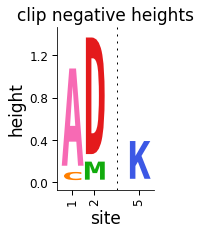

In [4]:
fig, ax = dmslogo.draw_logo(data=data,
                            x_col='site',
                            letter_col='letter',
                            letter_height_col='height',
                            clip_negative_heights=True,
                            title='clip negative heights')

Now let's draw the same plot but **not** clip the negative heights, see how the resulting plot shows the positive heights above and the negative heights below a black center line at zero:

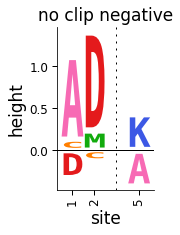

In [5]:
fig, ax = dmslogo.draw_logo(data=data,
                            x_col='site',
                            letter_col='letter',
                            letter_height_col='height',
                            title='no clip negative')

If you do not want to include the center line, set `draw_line_at_zero` to `'never'`:

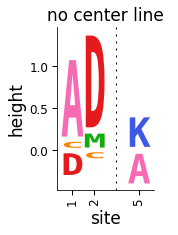

In [6]:
fig, ax = dmslogo.draw_logo(data=data,
                            x_col='site',
                            letter_col='letter',
                            letter_height_col='height',
                            title='no center line',
                            draw_line_at_zero='never')

We can also make a plot where we color the letters above and below the line different colors:

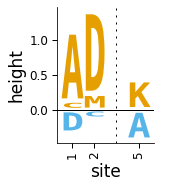

In [7]:
fig, ax = dmslogo.draw_logo(
        data=data
             .assign(color=lambda x: numpy.where(x['height'] > 0,
                                                 CBPALETTE[1],
                                                 CBPALETTE[2])),
        x_col='site',
        letter_col='letter',
        letter_height_col='height',
        color_col='color')

## Logo plots of HA immune selection
Now we make logo plots of real data from serum selection on influenza hemagglutinin (HA).
First, read in the data:

In [28]:
ha_df = pd.read_csv('input_files/HA_serum_diffsel.csv')

ha_df.head()

,sample,isite,site,wildtype,mutation,mutdiffsel,positive_diffsel,negative_diffsel
0,age 2.2,0,-16,M,A,-1.525,0.0,-16.841
1,age 2.2,0,-16,M,C,-1.040,0.0,-16.841
2,age 2.2,0,-16,M,D,-1.675,0.0,-16.841
3,age 2.2,0,-16,M,E,-1.050,0.0,-16.841
4,age 2.2,0,-16,M,F,-0.833,0.0,-16.841


Add a site label that gives both thte site and wildtype identity, and indicate which sites to show:

In [41]:
sites_to_show = ['157', '158', '159', '160', '188', '189', '190',
                 '192', '193', '194', '221', '222', '223']

ha_df = (ha_df
         .assign(
             site_label=lambda x: x['wildtype'] + x['site'],
             to_show=lambda x: x['site'].isin(sites_to_show)
             )
         )

First let's use [dmslogo.facet.facet_plot](https://jbloomlab.github.io/dmslogo/dmslogo.facet.html#dmslogo.facet.facet_plot) to facet logo plots for the samples.
First, we do this using `clip_negative_heights` to only show the posittive values:

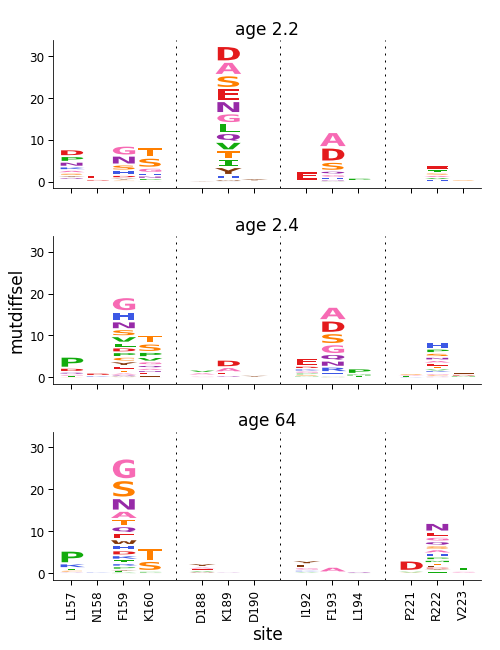

In [42]:
fig, axes = dmslogo.facet_plot(
                ha_df,
                gridrow_col='sample',
                x_col='isite',
                show_col='to_show',
                draw_logo_kwargs={'letter_col': 'mutation',
                                  'letter_height_col': 'mutdiffsel',
                                  'xtick_col': 'site_label',
                                  'xlabel': 'site',
                                  'clip_negative_heights': True},
                )

Now don't clip the negative values, but show those too:

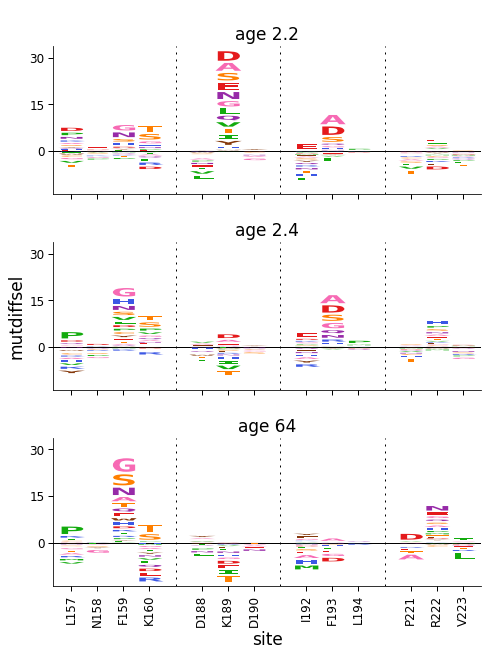

In [43]:
fig, axes = dmslogo.facet_plot(
                ha_df,
                gridrow_col='sample',
                x_col='isite',
                show_col='to_show',
                draw_logo_kwargs={'letter_col': 'mutation',
                                  'letter_height_col': 'mutdiffsel',
                                  'xtick_col': 'site_label',
                                  'xlabel': 'site'},
                )